In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [3]:
df = pd.read_csv('musteriler.csv')

In [4]:
x = df.iloc[:,3:].values

In [5]:
# KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_pred = kmeans.fit_predict(x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 3, 3, 0, 3, 1, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 3, 2, 3, 1, 0, 1, 3, 1, 3, 3, 0, 3, 3, 3, 1, 3, 2, 2, 1, 0, 1,
       1, 3, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 0, 3, 0, 2, 0, 3, 1, 3, 1,
       3, 0, 3, 1, 0, 0, 0, 0, 1, 1, 2, 0, 3, 1, 1, 1, 3, 3, 2, 0, 0, 3,
       1, 1, 0, 1, 2, 3, 1, 3, 1, 0, 1, 1, 3, 2, 0, 1, 1, 0, 0, 3, 3, 2,
       2, 0, 0, 0, 0, 3, 1, 0, 3, 3, 1, 3, 0, 0, 0, 3, 1, 1, 2, 1, 1, 3,
       3, 3, 3, 1, 3, 3, 0, 3, 0, 1, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 0, 1,
       3, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 3, 3, 0, 1, 1, 0, 1, 1, 3, 0, 1,
       1, 3, 2, 3, 3, 0, 3, 2, 0, 2, 1, 1, 3, 1, 3, 1, 3, 0, 1, 0, 0, 3,
       3, 3], dtype=int32)

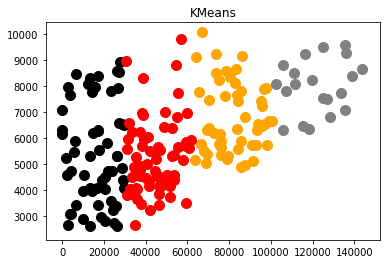

In [6]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='orange')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='black')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='grey')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='red')
plt.title('KMeans')
plt.show()

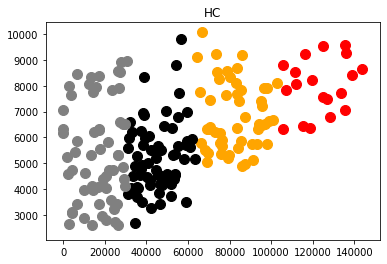

In [7]:
#Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred = ac.fit_predict(x)
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='orange')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='black')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='grey')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='red')
plt.title('HC')
plt.show()

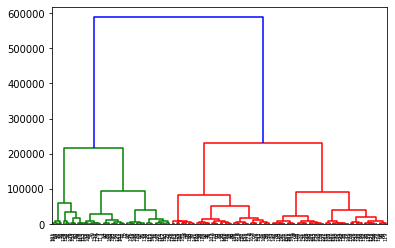

In [8]:
# dendrogram -- scipy
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [9]:
# dendrogram -- sklearn
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


df = pd.read_csv('musteriler.csv')
x = df.iloc[:,3:].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

TypeError: 'dict' object is not callable

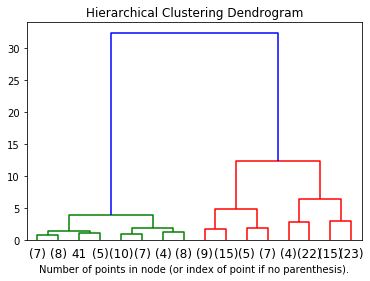

In [10]:
# OPEN SOURCE CODE

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()